In [106]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pycountry as pc
import country_converter as coco
import pycountry_convert as pc

In [3]:
raw_data = pd.read_csv("time_series_2019-ncov-Confirmed.csv")

In [4]:
raw_data.describe()

,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20
count,487.000000,487.000000,487.000000,487.000000,487.000000,487.000000,487.000000,487.000000,487.000000,487.000000,...,487.000000,487.000000,487.000000,487.000000,487.000000,487.000000,487.000000,487.000000,487.000000,487.000000
mean,30.580962,-33.601551,1.139630,1.340862,1.932238,2.944559,4.349076,6.010267,11.453799,12.661191,...,298.137577,320.521561,343.831622,372.745380,404.809035,441.293634,498.373717,558.862423,625.305955,689.845996
std,19.645817,81.064011,20.170391,20.253507,25.229268,35.129844,49.109575,66.178567,162.190044,163.249708,...,3248.509243,3309.559050,3380.171621,3463.800169,3561.212709,3693.726599,3886.851115,4121.144328,4397.961371,4658.551576
min,-41.454500,-157.858400,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,24.000000,-91.733100,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,37.545500,-73.794900,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,1.000000,1.000000,1.000000,2.000000,2.000000,3.000000,3.000000,4.000000
75%,42.171200,22.380900,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,17.000000,26.000000,31.000000,39.000000,56.000000,68.000000,80.500000,92.000000,125.000000,138.500000
max,71.706900,178.065000,444.000000,444.000000,549.000000,761.000000,1058.000000,1423.000000,3554.000000,3554.000000,...,67786.000000,67790.000000,67794.000000,67798.000000,67799.000000,67800.000000,67800.000000,67800.000000,67800.000000,67800.000000


In [5]:
raw_data.shape

(487, 65)

In [6]:
raw_data.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20
0,NaN,Thailand,15.0000,101.0000,2,3,5,7,8,8,...,75,82,114,147,177,212,272,322,411,599
1,NaN,Japan,36.0000,138.0000,2,1,2,2,4,4,...,701,773,839,825,878,889,924,963,1007,1086
2,NaN,Singapore,1.2833,103.8333,0,1,3,3,4,5,...,200,212,226,243,266,313,345,385,432,455
3,NaN,Nepal,28.1667,84.2500,0,0,0,1,1,1,...,1,1,1,1,1,1,1,1,1,2
4,NaN,Malaysia,2.5000,112.5000,0,0,0,3,4,4,...,197,238,428,566,673,790,900,1030,1183,1306


In [7]:
columns = raw_data.columns
print(len(columns))

65


In [8]:
raw_data = raw_data.loc[:, raw_data.isin([0]).mean() < .7]

In [9]:
raw_data.head()

,Province/State,Country/Region,Lat,Long,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,...,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20
0,NaN,Thailand,15.0000,101.0000,43,47,48,50,50,50,...,75,82,114,147,177,212,272,322,411,599
1,NaN,Japan,36.0000,138.0000,331,360,420,461,502,511,...,701,773,839,825,878,889,924,963,1007,1086
2,NaN,Singapore,1.2833,103.8333,110,117,130,138,150,150,...,200,212,226,243,266,313,345,385,432,455
3,NaN,Nepal,28.1667,84.2500,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,2
4,NaN,Malaysia,2.5000,112.5000,50,50,83,93,99,117,...,197,238,428,566,673,790,900,1030,1183,1306


In [63]:
countrywise = raw_data.groupby("Country/Region").sum().drop(['Lat','Long'],axis=1)

In [17]:
countrywise.head()

,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20
Country/Region,,,,,,,,,,,,,,,,,,,
Afghanistan,1,1,1,1,4,4,5,7,7,7,11,16,21,22,22,22,24,24,40
Albania,0,0,0,0,0,2,10,12,23,33,38,42,51,55,59,64,70,76,89
Algeria,12,12,17,17,19,20,20,20,24,26,37,48,54,60,74,87,90,139,201
Andorra,1,1,1,1,1,1,1,1,1,1,1,1,2,39,39,53,75,88,113
Angola,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2,2


In [18]:
cw_cols = countrywise.columns

In [28]:
top10 = countrywise.sort_values(by=cw_cols[-1],ascending=False)[:10]

In [30]:
top10[cw_cols[-1]]

Country/Region
China             81397
Italy             59138
US                33272
Spain             28768
Germany           24873
Iran              21638
France            16176
Korea, South       8897
Switzerland        7245
United Kingdom     5741
Name: 3/22/20, dtype: int64

<Figure size 432x288 with 0 Axes>

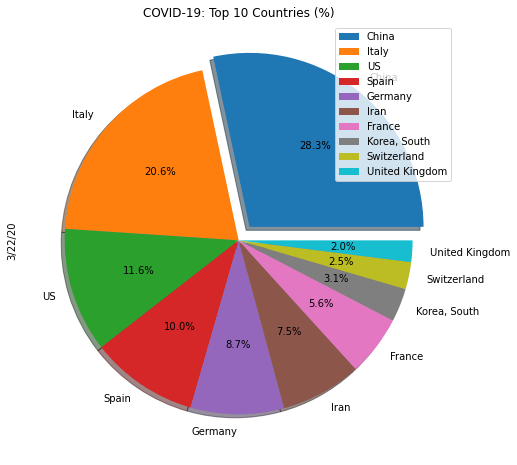

In [175]:
fig = plt.figure()
top10.plot.pie(y=cw_cols[-1],figsize=(8,8),title="COVID-19: Top 10 Countries (%)",autopct='%1.1f%%',shadow=True,explode = (0.1,0,0,0,0,0,0,0,0,0))

In [100]:
coco.convert(names=["India"],to="iso2")

'IN'

In [135]:
countrywise['code'] = countrywise.apply(lambda x:coco.convert(names=[x.name.replace(", The","")],to="iso2"),axis=1)

In [138]:
def contry_to_continent(ccode):
    try:
        cont_code = pc.country_alpha2_to_continent_code(ccode)
        continent = pc.convert_continent_code_to_continent_name(cont_code)
        return continent
    except:
        return None

In [139]:
countrywise['continent'] =  countrywise.apply(lambda x:contry_to_continent(x.code),axis=1)

In [145]:
continentwise = countrywise.groupby("continent").sum()
continentwise

,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20
continent,,,,,,,,,,,,,,,,,,,
Africa,21,24,43,43,83,91,104,118,134,177,254,313,400,484,601,781,969,1173,1429
Asia,89793,91070,93110,94848,96069,96941,98137,99915,101211,103061,104982,106919,108510,110617,112655,115141,117428,120153,123233
Europe,4341,5742,7516,9658,12202,14984,18389,23449,24185,38303,46494,54885,65651,76789,90440,108820,129335,150816,169316
North America,188,260,320,467,601,683,1062,1429,1840,2457,3053,3906,5247,7171,8758,14900,20630,27579,35783
Oceania,55,58,64,68,81,96,112,133,133,205,256,305,385,464,588,710,832,1125,1383
South America,16,22,34,40,62,69,91,124,143,293,358,421,637,920,1155,1643,2259,2964,4096


Text(0, 0.5, 'Number of Reported Cases')

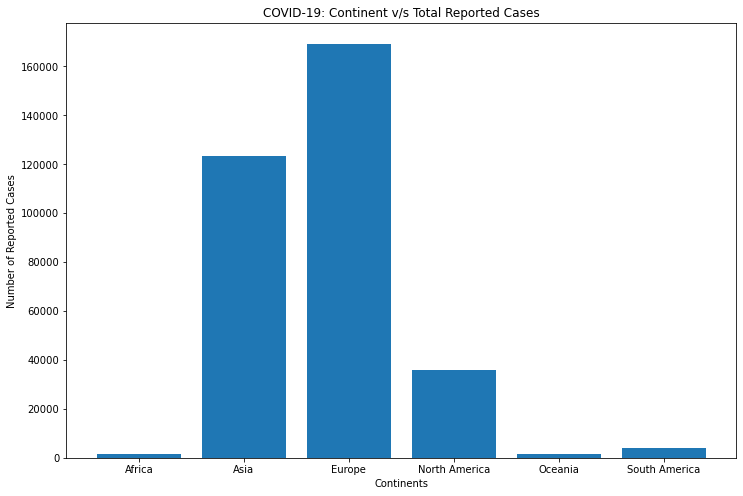

In [211]:
fig = plt.figure(figsize=(12,8))
plt.bar(x=continentwise.index,height=cw_cols[-1],data=continentwise,)
plt.title("COVID-19: Continent v/s Total Reported Cases")
plt.xlabel("Continents")
plt.ylabel("Number of Reported Cases")

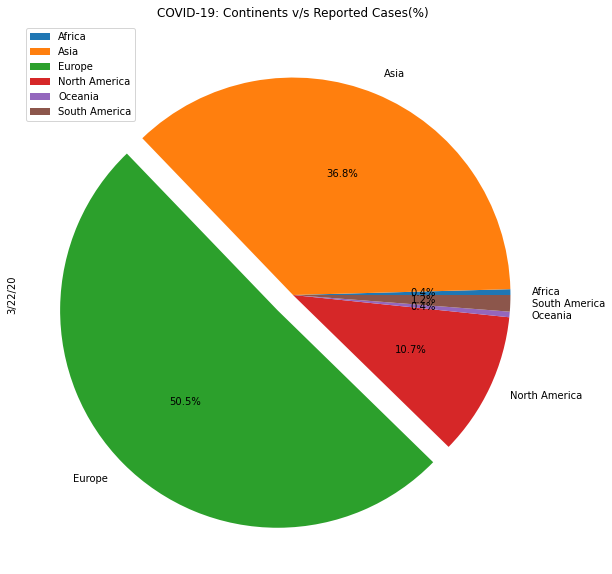

In [228]:
continentwise.plot.pie(y=cw_cols[-1],figsize=(10,10),title="COVID-19: Continents v/s Reported Cases(%)",autopct='%1.1f%%',explode = (0,0,0.1,0,0,0))

Text(0.5, 0, 'Date')

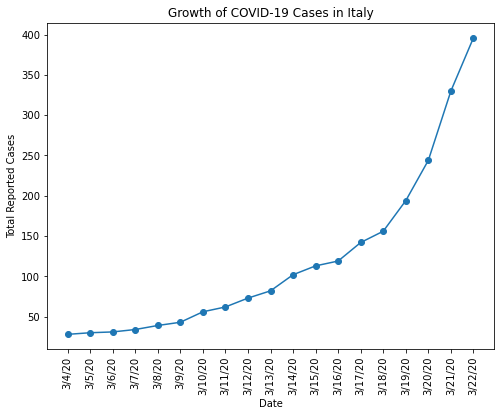

In [210]:
fig = plt.figure(figsize=(8,6))
plt.scatter(x=cw_cols,y=countrywise.loc['India'].to_list()[:-2])
plt.plot(cw_cols,countrywise.loc['India'].to_list()[:-2])
plt.xticks(cw_cols,cw_cols, rotation='vertical')
plt.title("Growth of COVID-19 Cases in Italy")
plt.ylabel("Total Reported Cases")
plt.xlabel("Date")

Text(0.5, 0, 'Date')

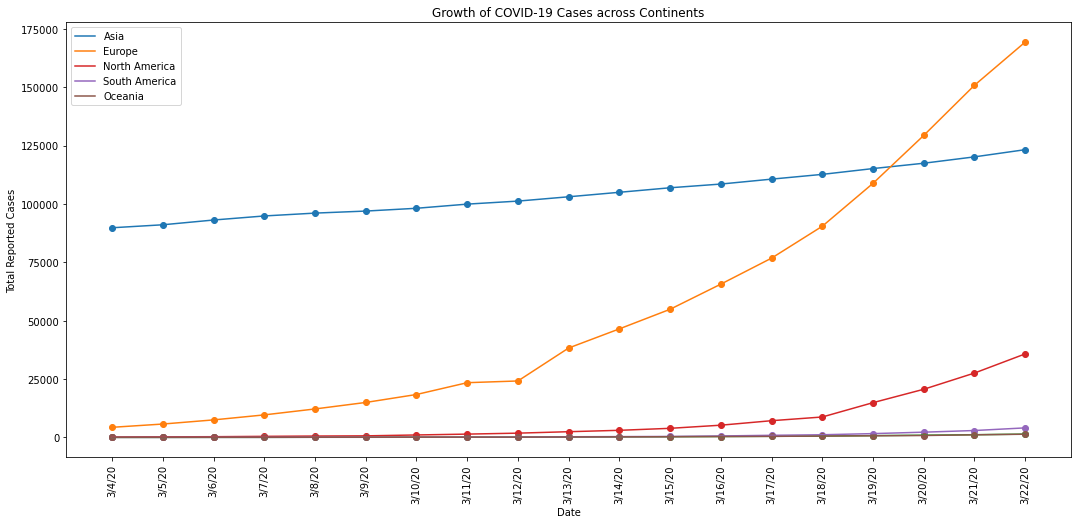

In [248]:
fig = plt.figure(figsize=(18,8))
plt.scatter(x=cw_cols,y=continentwise.loc['Asia'].to_list())
asia, = plt.plot(cw_cols,continentwise.loc['Asia'].to_list(),label="Asia")
plt.scatter(x=cw_cols,y=continentwise.loc['Europe'].to_list())
europe, = plt.plot(cw_cols,continentwise.loc['Europe'].to_list(),label="Europe")
plt.scatter(x=cw_cols,y=continentwise.loc['Africa'].to_list())
africa, = plt.plot(cw_cols,continentwise.loc['Africa'].to_list(),label="Africa")
plt.scatter(x=cw_cols,y=continentwise.loc['North America'].to_list())
na, = plt.plot(cw_cols,continentwise.loc['North America'].to_list(),label="North America")
plt.scatter(x=cw_cols,y=continentwise.loc['South America'].to_list())
sa, = plt.plot(cw_cols,continentwise.loc['South America'].to_list(),label="South America")
plt.scatter(x=cw_cols,y=continentwise.loc['Oceania'].to_list())
oceania, = plt.plot(cw_cols,continentwise.loc['Oceania'].to_list(),label="Oceania")
plt.legend(handles=[asia,europe,na,sa,oceania])

plt.xticks(cw_cols,cw_cols, rotation='vertical')
plt.title("Growth of COVID-19 Cases across Continents")
plt.ylabel("Total Reported Cases")
plt.xlabel("Date")